In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [6]:
#Loading the data
pd.set_option('display.max_columns', None)
data1 = pd.read_csv('ISIC_2020_Training_GroundTruth.csv')

In [7]:
data1.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [11]:
data1['diagnosis'].value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64

In [12]:
import os

In [14]:
main_directory = 'skincancerimages/'

In [15]:
data_directory = os.listdir('skincancerimages/')
print(data_directory)

['Test', 'Train']


In [19]:
test_directory = os.listdir('skincancerimages/Test')
print(test_directory)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [20]:
train_directory = os.listdir('skincancerimages/Train')
print(train_directory)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
x_akeratosis + x_basal + x_dermaf + x_melanoma + x_nevus + x_pbkeratosis + x_skeratosis + x_squamouscc + x_vlesions

In [30]:
for _set in ['Test', 'Train']:
    x_akeratosis = len(os.listdir(main_directory + _set + '/actinic keratosis'))
    x_basal = len(os.listdir(main_directory + _set + '/basal cell carcinoma'))
    x_dermaf = len(os.listdir(main_directory + _set + '/dermatofibroma'))
    x_melanoma = len(os.listdir(main_directory + _set + '/melanoma'))
    x_nevus = len(os.listdir(main_directory + _set + '/nevus'))
    x_pbkeratosis = len(os.listdir(main_directory + _set + '/pigmented benign keratosis'))
    x_skeratosis = len(os.listdir(main_directory + _set + '/seborrheic keratosis'))
    x_squamouscc = len(os.listdir(main_directory + _set + '/squamous cell carcinoma'))
    x_vlesions = len(os.listdir(main_directory + _set + '/vascular lesion'))
    print('Set: {}, actinic keratosis: {}, basal cell carcinoma: {}, dermatofibroma: {}, melanoma: {}, nevus: {}, pigmented benign keratosis: {}, seborrheic keratosis: {}, squamous cell carcinoma: {}, vascular lesion: {}, total: {}'.format(_set,
                    x_akeratosis, x_basal, x_dermaf, x_melanoma, x_nevus, x_pbkeratosis, x_skeratosis,
                    x_squamouscc, x_vlesions, (x_akeratosis + x_basal + x_dermaf + x_melanoma + x_nevus +
                                                            x_pbkeratosis + x_skeratosis + x_squamouscc + x_vlesions)))

Set: Test, actinic keratosis: 16, basal cell carcinoma: 16, dermatofibroma: 16, melanoma: 16, nevus: 16, pigmented benign keratosis: 16, seborrheic keratosis: 3, squamous cell carcinoma: 16, vascular lesion: 3, total: 118
Set: Train, actinic keratosis: 114, basal cell carcinoma: 376, dermatofibroma: 95, melanoma: 438, nevus: 357, pigmented benign keratosis: 462, seborrheic keratosis: 77, squamous cell carcinoma: 181, vascular lesion: 139, total: 2239


In [ ]:
def display_image_plt(data): 
    fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(10, 20))
    ax = ax.ravel()
    plt.tight_layout()

    for i, _set in enumerate(['Test', 'Train']):
        set_path = main_directory+_set
        ax[i].imshow(plt.imread(os.listdir(set_path+'/actinic keratosis')[0]))
        ax[i].set_title('Actinic Keratosis')
        ax[2].imshow(plt.imread(os.listdir(set_path+'/basal cell carcinoma')[0]))
        ax[2].set_title('Basal Cell Carcinoma')
        ax[3].imshow(plt.imread(os.listdir(set_path+'/dermatofibroma')[0]))
        ax[3].set_title('Dermatofibroma')
        ax[4].imshow(plt.imread(os.listdir(set_path+'/melanoma')[0]))
        ax[4].set_title('Melanoma')
        ax[5].imshow(plt.imread(set_path+'/nevus/'+os.listdir(set_path+'/nevus')[0]))
        ax[5].set_title('Nevus')
        ax[6].imshow(plt.imread(set_path+'/pigmented benign keratosis/'+os.listdir(set_path+'/pigmented benign keratosis')[0]))
        ax[6].set_title('Pigmented Benign Keratosis')
        ax[7].imshow(plt.imread(set_path+'/seborrheic keratosis/'+os.listdir(set_path+'/seborrheic keratosis')[0]))
        ax[7].set_title('Seborrheic Keratosis')
        ax[8].imshow(plt.imread(set_path+'/squamous cell carcinoma/'+os.listdir(set_path+'/squamous cell carcinoma')[0]))
        ax[8].set_title('Squamous Cell Carcinoma')
        ax[9].imshow(plt.imread(set_path+'/vascular lesion/'+os.listdir(set_path+'/vascular lesion')[0]))
        ax[9].set_title('Vascular lesion')

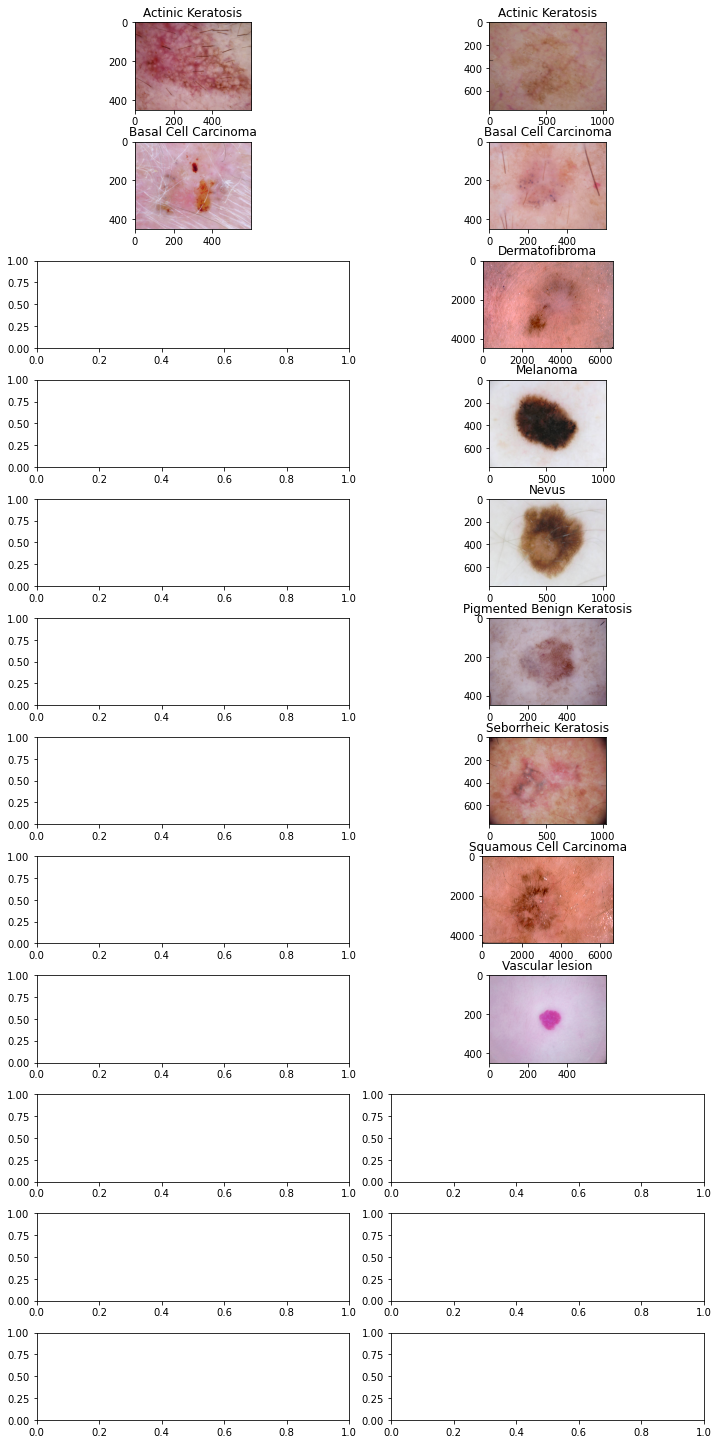

In [136]:
#displaying images
fig, ax = plt.subplots(12,2, figsize=(10, 20))
ax = ax.ravel()
plt.tight_layout()
# delete empty axes
#for i in [11]:
   # fig.delaxes(ax.flatten()[i])


for i, _set in enumerate(['Train', 'Test']):
        set_path = main_directory+_set
        ax[i].imshow(plt.imread(set_path+'/actinic keratosis/'+os.listdir(set_path+'/actinic keratosis')[0]))
        ax[i].set_title('Actinic Keratosis')
        ax[i+2].imshow(plt.imread(set_path+'/basal cell carcinoma/'+os.listdir(set_path+'/basal cell carcinoma')[0]))
        ax[i+2].set_title('Basal Cell Carcinoma')
        ax[2+3].imshow(plt.imread(set_path+'/dermatofibroma/'+os.listdir(set_path+'/dermatofibroma')[2]))
        ax[2+3].set_title('Dermatofibroma')
        ax[3+4].imshow(plt.imread(set_path+'/melanoma/'+os.listdir(set_path+'/melanoma')[2]))
        ax[3+4].set_title('Melanoma')
        ax[4+5].imshow(plt.imread(set_path+'/nevus/'+os.listdir(set_path+'/nevus')[2]))
        ax[4+5].set_title('Nevus')
        ax[5+6].imshow(plt.imread(set_path+'/pigmented benign keratosis/'+os.listdir(set_path+'/pigmented benign keratosis')[2]))
        ax[5+6].set_title('Pigmented Benign Keratosis')
        ax[6+7].imshow(plt.imread(set_path+'/seborrheic keratosis/'+os.listdir(set_path+'/seborrheic keratosis')[2]))
        ax[6+7].set_title('Seborrheic Keratosis')
        ax[7+8].imshow(plt.imread(set_path+'/squamous cell carcinoma/'+os.listdir(set_path+'/squamous cell carcinoma')[2]))
        ax[7+8].set_title('Squamous Cell Carcinoma')
        ax[8+9].imshow(plt.imread(set_path+'/vascular lesion/'+os.listdir(set_path+'/vascular lesion')[2]))
        ax[8+9].set_title('Vascular lesion')

In [105]:
def display_images(data): 
    fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(10, 20))
    ax = ax.ravel()
    plt.tight_layout()

    for i, _set in enumerate(['Test', 'Train']):
        set_path = main_directory+_set
        ax[i].imshow(plt.imread(set_path+'/actinic keratosis/'+os.listdir(set_path+'/actinic keratosis')[0]))
        ax[i].set_title('Actinic Keratosis')
        ax[2].imshow(plt.imread(set_path+'/basal cell carcinoma/'+os.listdir(set_path+'/basal cell carcinoma')[0]))
        ax[2].set_title('Basal Cell Carcinoma')
        ax[3].imshow(plt.imread(set_path+'/dermatofibroma/'+os.listdir(set_path+'/dermatofibroma')[0]))
        ax[3].set_title('Dermatofibroma')
        ax[4].imshow(plt.imread(set_path+'/melanoma/'+os.listdir(set_path+'/melanoma')[0]))
        ax[4].set_title('Melanoma')
        ax[5].imshow(plt.imread(set_path+'/nevus/'+os.listdir(set_path+'/nevus')[0]))
        ax[5].set_title('Nevus')
        ax[6].imshow(plt.imread(set_path+'/pigmented benign keratosis/'+os.listdir(set_path+'/pigmented benign keratosis')[0]))
        ax[6].set_title('Pigmented Benign Keratosis')
        ax[7].imshow(plt.imread(set_path+'/seborrheic keratosis/'+os.listdir(set_path+'/seborrheic keratosis')[0]))
        ax[7].set_title('Seborrheic Keratosis')
        ax[8].imshow(plt.imread(set_path+'/squamous cell carcinoma/'+os.listdir(set_path+'/squamous cell carcinoma')[0]))
        ax[8].set_title('Squamous Cell Carcinoma')
        ax[9].imshow(plt.imread(set_path+'/vascular lesion/'+os.listdir(set_path+'/vascular lesion')[0]))
        ax[9].set_title('Vascular lesion')

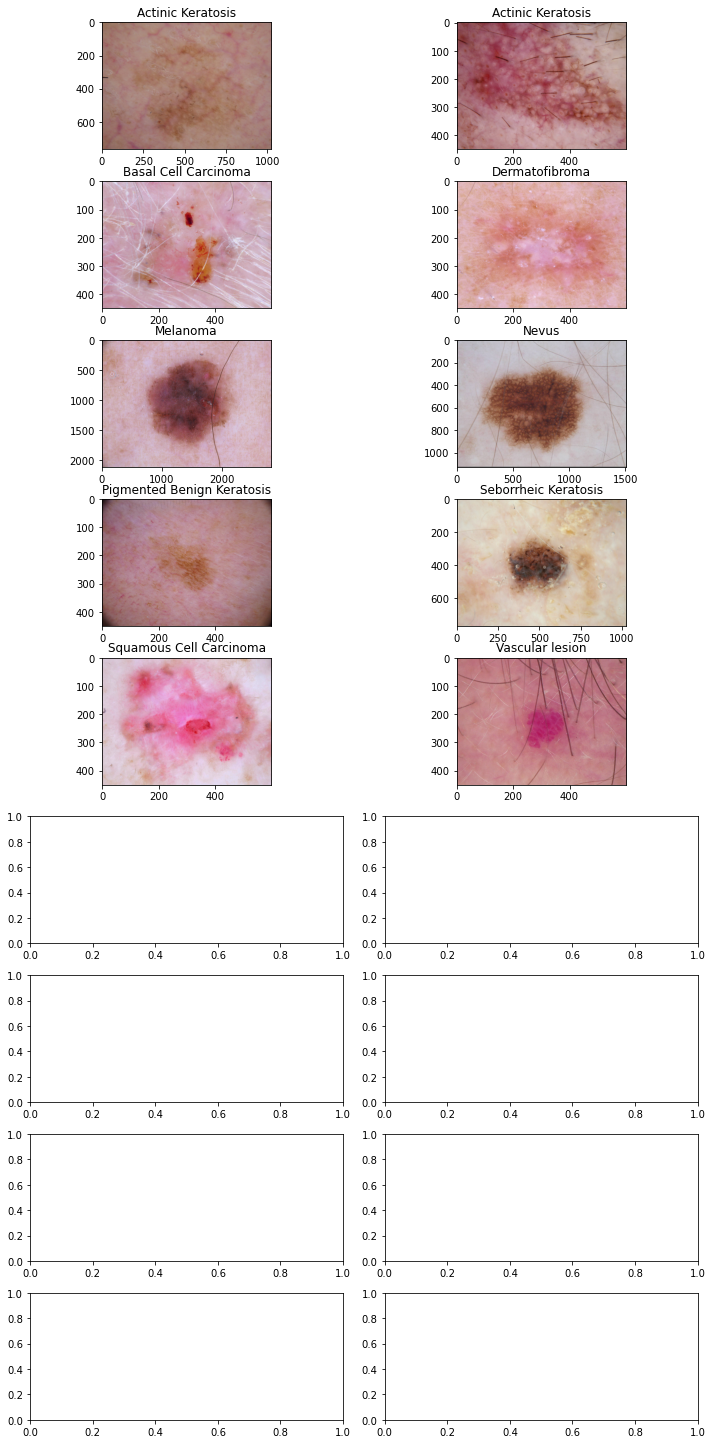

In [106]:
display_images(test_directory)

FileNotFoundError: [Errno 2] No such file or directory: 'skincancerimages/Test/vascular lesion/ISIC_0024312.jpg'

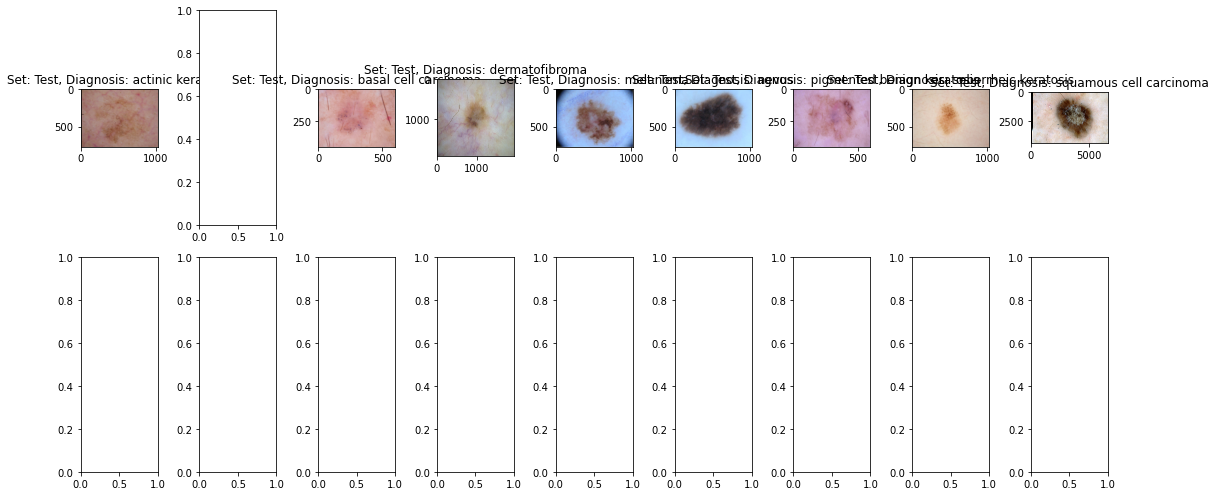

In [36]:
fig, ax = plt.subplots(2, 9, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['Test', 'Train']):
    set_path = main_directory+_set
    ax[i].imshow(plt.imread(set_path+'/actinic keratosis/'+os.listdir(set_path+'/actinic keratosis')[0]))
    ax[i].set_title('Set: {}, Diagnosis: actinic keratosis'.format(_set))
    ax[i+2].imshow(plt.imread(set_path+'/basal cell carcinoma/'+os.listdir(set_path+'/basal cell carcinoma')[0]))
    ax[i+2].set_title('Set: {}, Diagnosis: basal cell carcinoma'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/dermatofibroma/'+os.listdir(set_path+'/dermatofibroma')[0]))
    ax[i+3].set_title('Set: {}, Diagnosis: dermatofibroma'.format(_set))
    ax[i+4].imshow(plt.imread(set_path+'/melanoma/'+os.listdir(set_path+'/melanoma')[0]))
    ax[i+4].set_title('Set: {}, Diagnosis: melanoma'.format(_set))
    ax[i+5].imshow(plt.imread(set_path+'/nevus/'+os.listdir(set_path+'/nevus')[0]))
    ax[i+5].set_title('Set: {}, Diagnosis: nevus'.format(_set))
    ax[i+6].imshow(plt.imread(set_path+'/pigmented benign keratosis/'+os.listdir(set_path+'/pigmented benign keratosis')[0]))
    ax[i+6].set_title('Set: {}, Diagnosis: pigmented benign keratosis'.format(_set))
    ax[i+7].imshow(plt.imread(set_path+'/seborrheic keratosis/'+os.listdir(set_path+'/seborrheic keratosis')[0]))
    ax[i+7].set_title('Set: {}, Diagnosis: seborrheic keratosis'.format(_set))
    ax[i+8].imshow(plt.imread(set_path+'/squamous cell carcinoma/'+os.listdir(set_path+'/squamous cell carcinoma')[0]))
    ax[i+8].set_title('Set: {}, Diagnosis: squamous cell carcinoma'.format(_set))
    ax[i+9].imshow(plt.imread(set_path+'/vascular lesion/'+os.listdir(set_path+'/pigmented benign keratosis')[0]))
    ax[i+9].set_title('Set: {}, Diagnosis: vascular lesion'.format(_set))

In [ ]:
y = data['label'].copy()
X = data.drop('label', axis=1).copy()

In [33]:
sample_data = pd.Series(list(zip(X, y))).sample(9)

sample_X = np.stack(np.array(sample_data.apply(lambda x: x[0])))
sample_y = np.array(sample_data.apply(lambda x: x[1]))

NameError: name 'X' is not defined

TypeError: Image data of dtype <U1 cannot be converted to float

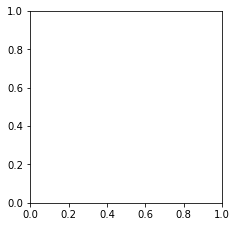

In [35]:
plt.figure(figsize=(12, 12))

for i, _set in enumerate(['Test', 'Train']):
    set_path = main_directory+_set

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(set_path[i]))
    img_label = label_mapping[set_path[i]]
    plt.title(img_label)
    plt.axis("off")

plt.show()

In [ ]:
label = [ 'ak', 'bcc','bkl','df','mel', 'nv',  'vasc']
label_images = []
classes = [ 'actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus',
            'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

fig = plt.figure(figsize=(55, 55))
s = range(7)

for i in label:
    sample = metadata[metadata['dx'] == i]['image_id'][:5]
    label_images.extend(sample)
    
for position,ID in enumerate(label_images):
    labl = metadata[metadata['image_id'] == ID]['dx']
    im_sample = data_dir + "/" + labl.values[0] + f'/{ID}.jpg'
    im_sample = imageio.imread(im_sample)

    plt.subplot(7,5,position+1)
    plt.imshow(im_sample)
    plt.axis('off')

    if position%5 == 0:
        title = int(position/5)
        plt.title(classes[title], loc='left', size=50, weight="bold")

plt.tight_layout()
plt.show()

In [50]:
classes = [ 'actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus',
            'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

In [66]:
import matplotlib.pyplot as plt
from pathlib import Path
from glob import glob

def display_images(directory): 
# create a list of directories
    classes = [ 'actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus',
                'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

    # extract the image paths into a list
    files = [f for dir_ in classes for f in list(Path(dir_).glob('*.jpg'))]

    # create the figure
    fig, axs = plt.subplots(nrows=9, ncols=2, figsize=(10, 10))


    # iterate through and enumerate the files, use i to index the axes
    for i, file in enumerate(files):

        # read the image in
        pic = plt.imread(file)

        # add the image to the axes
        axs[i].imshow(pic)

        # add an axes title; .stem is a pathlib method to get the filename
        axs[i].set(title=file.stem)

    # add a figure title
    fig.suptitle('Cancers', fontsize=18)

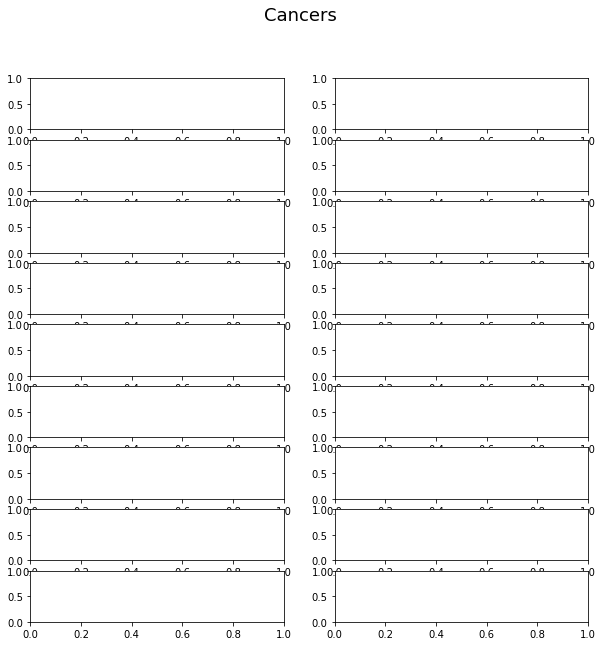

In [67]:
display_images('actinic keratosis')

NameError: name 'images' is not defined

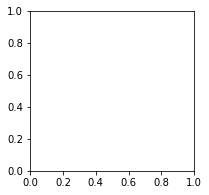

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, _set in enumerate(['Test', 'Train']):
    set_path = main_directory+_set
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [51]:
np.random.seed(42)
images = ImageDataBunch.from_directory(main_directory, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

NameError: name 'ImageDataBunch' is not defined